<a href="https://colab.research.google.com/github/WizziGameDev/fuzzy-logic-tip/blob/main/Fuzzy_Tip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

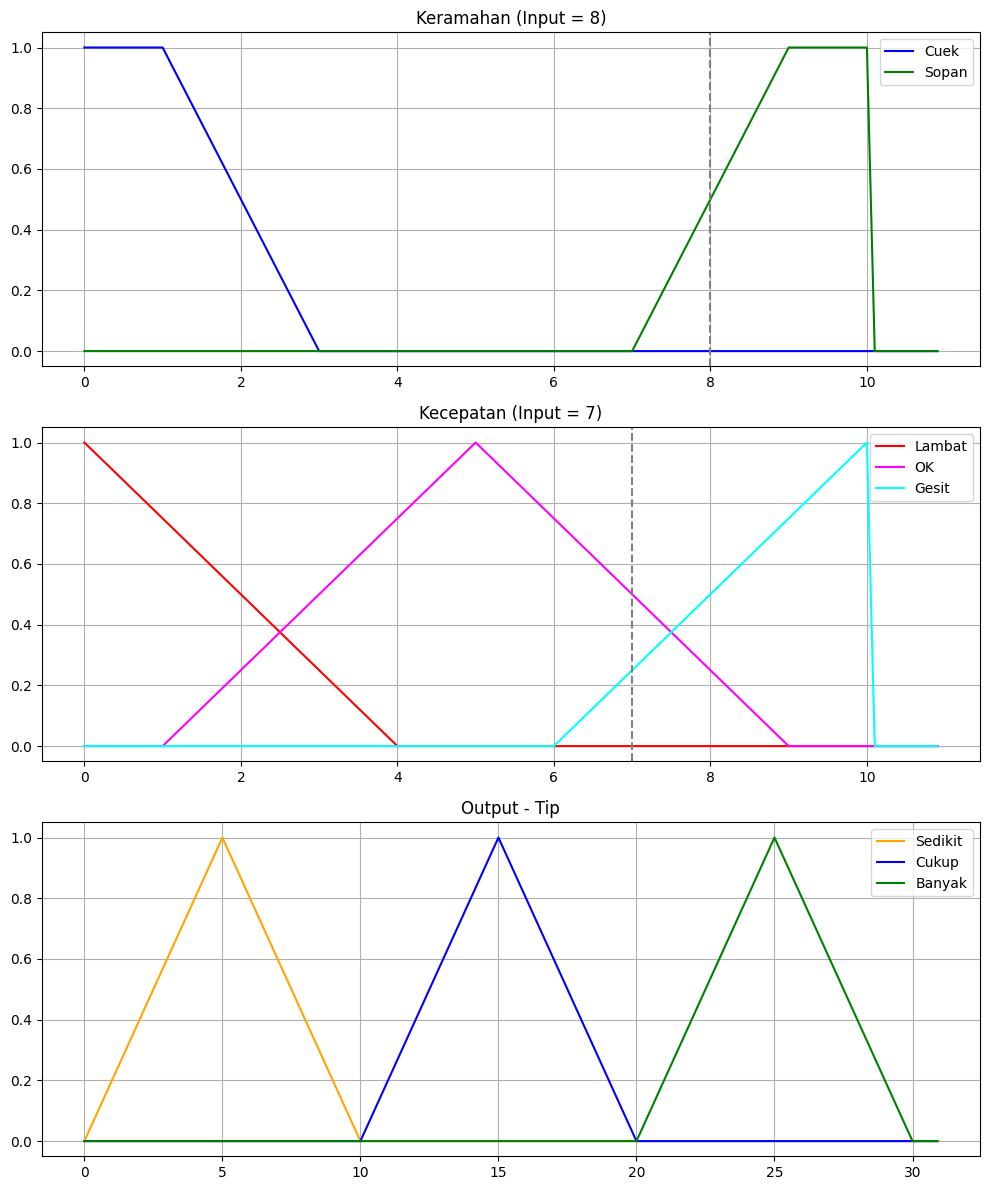


Fuzzy Rules
Rule 1 (Sedikit) = 0.00
Rule 2 (Cukup)   = 0.50
Rule 3 (Banyak)  = 0.50



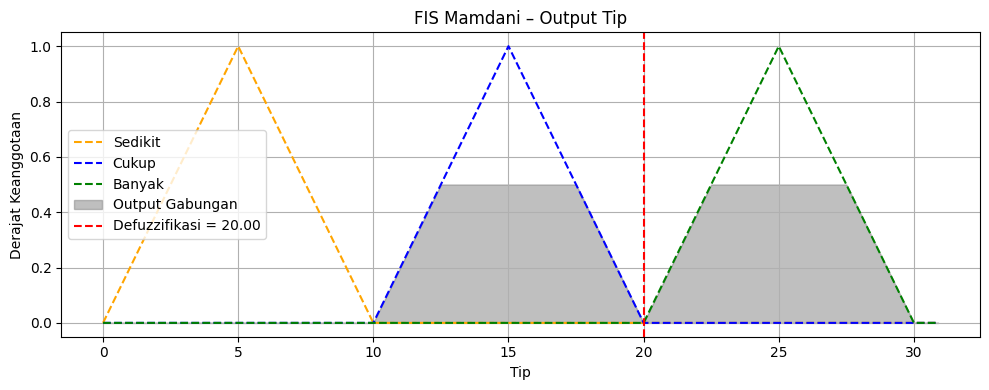


Nilai akhir tip (defuzzifikasi): 20.00%


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid  # Mengimpor fungsi trapezoid

# Input
input_keramahan = 8
input_kecepatan = 7

# Domain
x_keramahan = np.arange(0, 11, 0.1)
x_kecepatan = np.arange(0, 11, 0.1)
x_tip = np.arange(0, 31, 0.1)

# Fungsi keanggotaan
keramahan_cuek = np.piecewise(x_keramahan,
    [x_keramahan <= 1, (x_keramahan > 1) & (x_keramahan <= 3), x_keramahan > 3],
    [1, lambda x: (3 - x) / 2, 0])
keramahan_sopan = np.piecewise(x_keramahan,
    [x_keramahan < 7, (x_keramahan >= 7) & (x_keramahan <= 9), (x_keramahan > 9) & (x_keramahan <= 10)],
    [0, lambda x: (x - 7) / 2, 1])

kecepatan_lambat = np.piecewise(x_kecepatan,
    [x_kecepatan <= 0, (x_kecepatan > 0) & (x_kecepatan <= 4), x_kecepatan > 4],
    [1, lambda x: (4 - x) / 4, 0])
kecepatan_ok = np.piecewise(x_kecepatan,
    [x_kecepatan <= 1, (x_kecepatan > 1) & (x_kecepatan <= 5), (x_kecepatan > 5) & (x_kecepatan <= 9), x_kecepatan > 9],
    [0, lambda x: (x - 1) / 4, lambda x: (9 - x) / 4, 0])
kecepatan_gesit = np.piecewise(x_kecepatan,
    [x_kecepatan <= 6, (x_kecepatan > 6) & (x_kecepatan <= 10), x_kecepatan > 10],
    [0, lambda x: (x - 6) / 4, 0])

tip_sedikit = np.piecewise(x_tip,
    [x_tip <= 0, (x_tip > 0) & (x_tip <= 5), (x_tip > 5) & (x_tip <= 10), x_tip > 10],
    [0, lambda x: (x - 0) / 5, lambda x: (10 - x) / 5, 0])
tip_cukup = np.piecewise(x_tip,
    [x_tip <= 10, (x_tip > 10) & (x_tip <= 15), (x_tip > 15) & (x_tip <= 20), x_tip > 20],
    [0, lambda x: (x - 10) / 5, lambda x: (20 - x) / 5, 0])
tip_banyak = np.piecewise(x_tip,
    [x_tip <= 20, (x_tip > 20) & (x_tip <= 25), (x_tip > 25) & (x_tip <= 30), x_tip > 30],
    [0, lambda x: (x - 20) / 5, lambda x: (30 - x) / 5, 0])

# Fuzzifikasi nilai input
mu_cuek = 1 if input_keramahan <= 1 else (3 - input_keramahan) / 2 if input_keramahan <= 3 else 0
mu_sopan = 0 if input_keramahan < 7 else (input_keramahan - 7) / 2 if input_keramahan <= 9 else 1

mu_lambat = 1 if input_kecepatan <= 0 else (4 - input_kecepatan) / 4 if input_kecepatan <= 4 else 0
mu_ok = (input_kecepatan - 1) / 4 if 1 < input_kecepatan <= 5 else (9 - input_kecepatan) / 4 if 5 < input_kecepatan <= 9 else 0
mu_gesit = 0 if input_kecepatan <= 6 else (input_kecepatan - 6) / 4 if input_kecepatan <= 10 else 0

# Fuzzy rules
rule_1 = max(mu_lambat, mu_cuek)  # Sedikit
rule_2 = mu_ok                    # Cukup
rule_3 = max(mu_gesit, mu_sopan) # Banyak

# Visualisasi Input & Output
fig, axs = plt.subplots(nrows=3, figsize=(10, 12))

# Visualisasi Keramahan
axs[0].plot(x_keramahan, keramahan_cuek, label='Cuek', color='blue')
axs[0].plot(x_keramahan, keramahan_sopan, label='Sopan', color='green')
axs[0].axvline(input_keramahan, color='gray', linestyle='--')
axs[0].set_title(f'Keramahan (Input = {input_keramahan})')
axs[0].legend()
axs[0].grid(True)

# Visualisasi Kecepatan
axs[1].plot(x_kecepatan, kecepatan_lambat, label='Lambat', color='red')
axs[1].plot(x_kecepatan, kecepatan_ok, label='OK', color='magenta')
axs[1].plot(x_kecepatan, kecepatan_gesit, label='Gesit', color='cyan')
axs[1].axvline(input_kecepatan, color='gray', linestyle='--')
axs[1].set_title(f'Kecepatan (Input = {input_kecepatan})')
axs[1].legend()
axs[1].grid(True)

# Visualisasi Output TIP
axs[2].plot(x_tip, tip_sedikit, label='Sedikit', color='orange')
axs[2].plot(x_tip, tip_cukup, label='Cukup', color='blue')
axs[2].plot(x_tip, tip_banyak, label='Banyak', color='green')
axs[2].set_title('Output - Tip')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Tampilkan hasil rules
print("\nFuzzy Rules")
print(f"Rule 1 (Sedikit) = {rule_1:.2f}")
print(f"Rule 2 (Cukup)   = {rule_2:.2f}")
print(f"Rule 3 (Banyak)  = {rule_3:.2f}\n")

# Defuzzifikasi
# Fungsi keanggotaan TIP (segitiga/trapesium)
def mf_tip_sedikit(x):
    return np.maximum(0, np.minimum((x - 0) / 5, (10 - x) / 5))

def mf_tip_cukup(x):
    return np.maximum(0, np.minimum((x - 10) / 5, (20 - x) / 5))

def mf_tip_banyak(x):
    return np.maximum(0, np.minimum((x - 20) / 5, (30 - x) / 5))

# Inferensi Mamdani: potong fungsi keanggotaan dengan nilai rule (min)
mu_sedikit = np.fmin(rule_1, mf_tip_sedikit(x_tip))
mu_cukup = np.fmin(rule_2, mf_tip_cukup(x_tip))
mu_banyak = np.fmin(rule_3, mf_tip_banyak(x_tip))

# Gabungkan semua hasil aturan (max)
aggregated = np.fmax(mu_sedikit, np.fmax(mu_cukup, mu_banyak))

# Fungsi Implikasi: Menghitung luas di bawah kurva (integrasi numerik dengan Trapezoidal Rule)
area = trapezoid(aggregated, x_tip)  # Luas daerah di bawah kurva

# Hitung Momen Centroid (centroid method)
numerator = trapezoid(aggregated * x_tip, x_tip)  # Sum(membership * x)
denominator = area  # Sum(membership)

defuzzified = numerator / denominator

# Visualisasi Output Tip
plt.figure(figsize=(10, 4))
plt.plot(x_tip, mf_tip_sedikit(x_tip), '--', label='Sedikit', color='orange')
plt.plot(x_tip, mf_tip_cukup(x_tip), '--', label='Cukup', color='blue')
plt.plot(x_tip, mf_tip_banyak(x_tip), '--', label='Banyak', color='green')
plt.fill_between(x_tip, aggregated, alpha=0.5, color='gray', label='Output Gabungan')
plt.axvline(defuzzified, color='red', linestyle='--', label=f'Defuzzifikasi = {defuzzified:.2f}')
plt.title('FIS Mamdani – Output Tip')
plt.xlabel('Tip')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Tampilkan hasil defuzzifikasi
print(f"\nNilai akhir tip (defuzzifikasi): {defuzzified:.2f}%")
